In [1]:
# system
import os

# matrix manipulation
import numpy as np

# visualization
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# save/load data
import pickle

# custom modules
from utils import *
from maze_util import *
from maze import *

## Diffuse Points

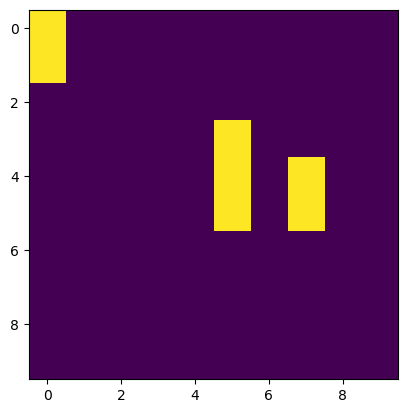


[INFO] Iteration:  1
[[1.   0.05 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.05 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.05 0.   0.   0.   0.   0.05 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 1.   0.05 0.05 0.   0.  ]
 [0.   0.   0.   0.   0.05 1.   0.1  1.   0.05 0.  ]
 [0.   0.   0.   0.   0.05 1.   0.1  1.   0.05 0.  ]
 [0.   0.   0.   0.   0.   0.05 0.   0.05 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]

[INFO] Iteration:  2
[[1.   0.1  0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.1  0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.1  0.01 0.   0.   0.01 0.1  0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.1  1.   0.11 0.1  0.01 0.  ]
 [0.   0.   0.   0.   0.11 1.   0.21 1.   0.1  0.  ]
 [0.   0.   0.   0.   0.1  1.   0.2  1.   0.1  0.  ]
 [0.   0.   0.   0.   0.01 0.1  0.01 0.1  0.01 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 

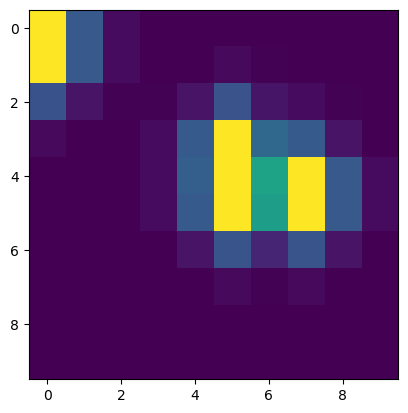

In [2]:
N=10
initial=np.zeros((N,N))

# put one particle in the middle
initial[0,0]=1
initial[1,0]=1
initial[N//2-2,N//2]=1
initial[N//2-1,N//2]=1
initial[N//2,N//2]=1

# initial[N//2-2,N//2 + 1]=1
initial[N//2-1,N//2 + 2]=1
initial[N//2,N//2 + 2]=1


plt.imshow(initial)
plt.show()

cur_state = initial.copy()
for i in range(5):
    cur_state = diffusion(cur_state)
    # round to nearest two decimal places
    print("\n[INFO] Iteration: ",i+1)
    print(np.round(cur_state,2))

plt.imshow(cur_state)
plt.show()

 ## Maze Generator

[INFO] generating path:  0  at layer:  1
 [INFO] direction:  -1
 [INFO] length:  0
[INFO] generating path:  0  at layer:  2
 [INFO] direction:  -1
 [INFO] length:  1
[INFO] generating path:  0  at layer:  3
 [INFO] direction:  0
     [INFO] staying:  2 1
[INFO] generating path:  0  at layer:  4
 [INFO] direction:  1
 [INFO] length:  2
     [INFO] going right:  1 1

[INFO] Layer:  0


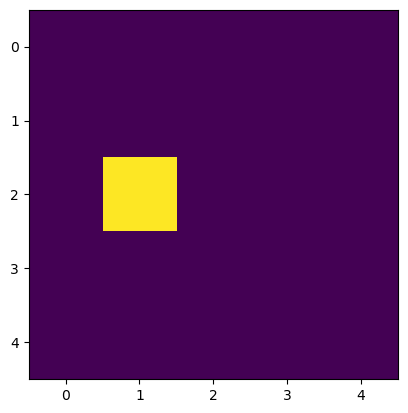


[INFO] Layer:  1


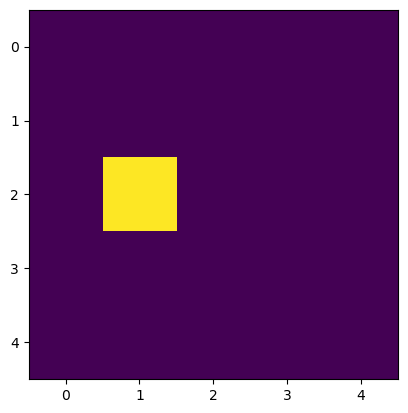


[INFO] Layer:  2


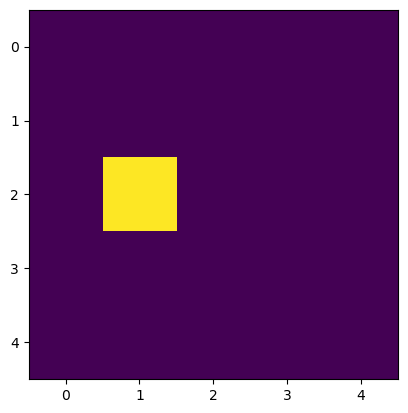


[INFO] Layer:  3


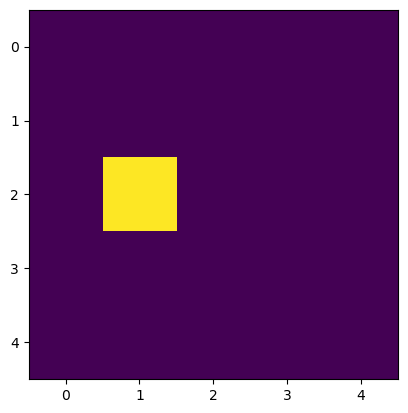


[INFO] Layer:  4


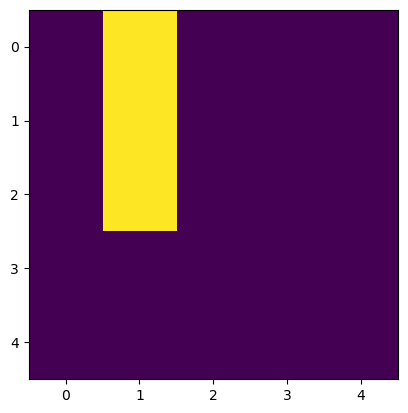

In [3]:
num_column = 5
num_row = 5
num_layer = 5

Maze, layer_map, starting_pt = maze_generator(
    num_column_=num_column, num_row_=num_row, num_layer_=num_layer, num_paths_=1
)

# print each layer
for i in range(num_layer):
    print("\n[INFO] Layer: ", i)
    plt.imshow(Maze[:, :, i])
    plt.show()

layer_map = np.zeros((num_column, num_row, num_layer))

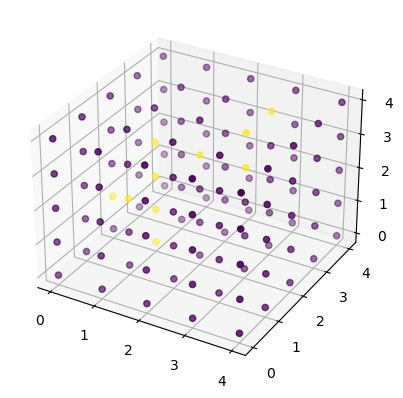

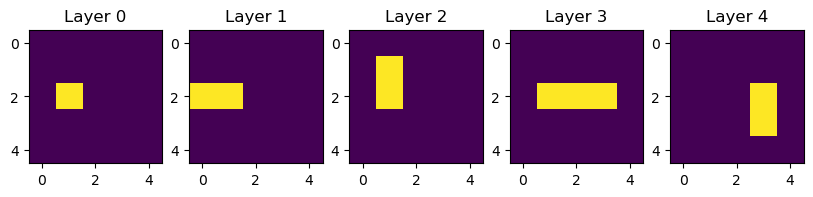

array([[1, 1, 2],
       [2, 0, 1],
       [2, 1, 0],
       [2, 1, 1],
       [2, 1, 2],
       [2, 1, 3],
       [2, 2, 3],
       [2, 3, 3],
       [2, 3, 4],
       [3, 3, 4]])

In [4]:
maze_id = "01"
SAVE_MAZE = False

if SAVE_MAZE:
    # save the layer map and the maze
    np.save("./saved_maze/Maze_" + maze_id + ".npy", Maze)
    pickle.dump(layer_map, open("./saved_maze/layer_map_" + maze_id + ".p", "wb"))

# load the layer map and the maze
Maze = np.load("./saved_maze/Maze_" + maze_id + ".npy", allow_pickle=True)
layer_map = pickle.load(open("./saved_maze/layer_map_" + maze_id + ".p", "rb"))

l_maze = Layered_Maze(Maze, layer_map, num_paths_=1)
l_maze.show_maze()
l_maze.show_layer_map()
l_maze.get_all_accessible_points()


[INFO] Layer:  1


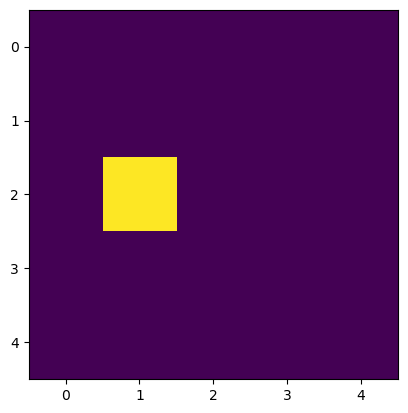


[INFO] Layer:  2


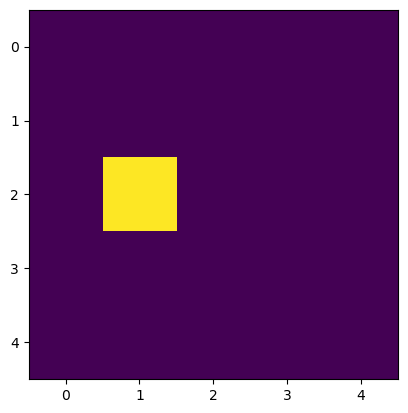


[INFO] Layer:  3


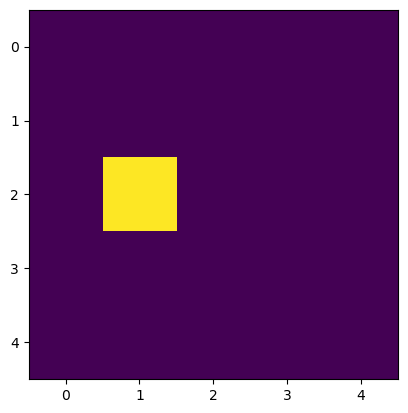


[INFO] Layer:  4


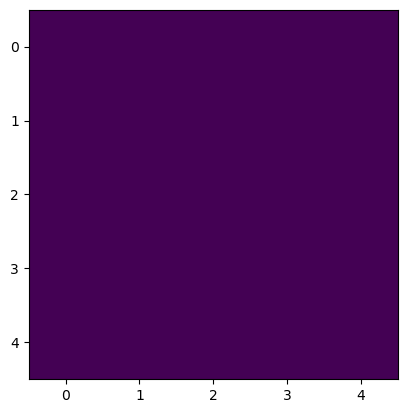

False

In [5]:
l_maze.is_super_acessible((2, 1, 0), verbose=True)

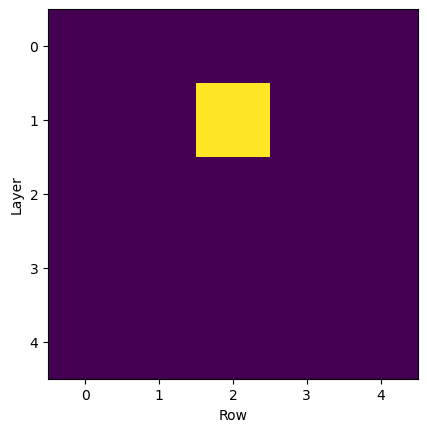

In [6]:
'''
A Iterative Slicing Method to Solve the Maze
'''
# extract a vertical slice of the maze
slice_column = 1

plt.imshow(l_maze.get_column(slice_column))
# title the axes
plt.xlabel("Row")
plt.ylabel("Layer")
plt.show()


[INFO] Layer:  0  and  1


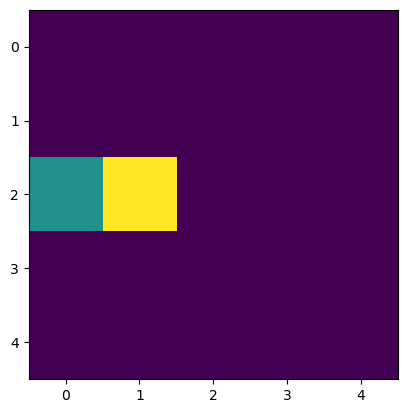


[INFO] Layer:  1  and  2


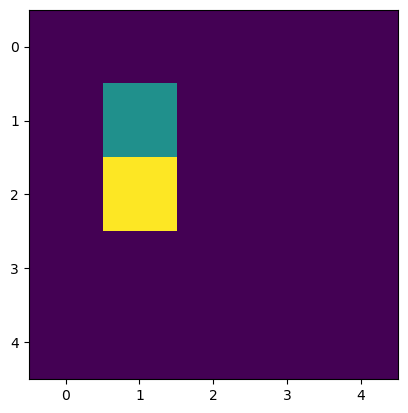


[INFO] Layer:  2  and  3


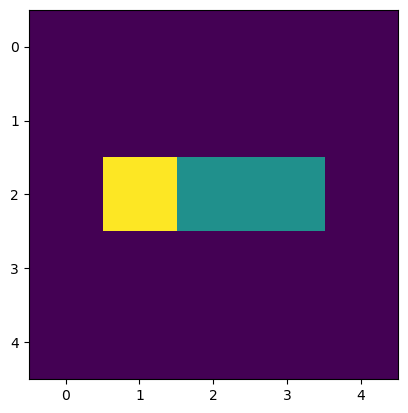


[INFO] Layer:  3  and  4


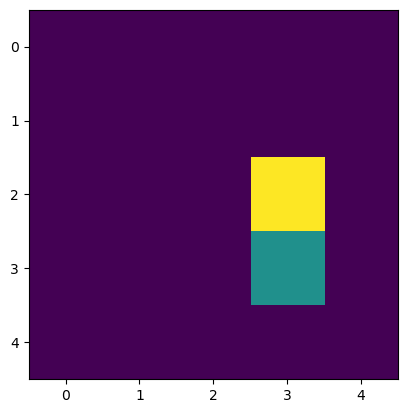

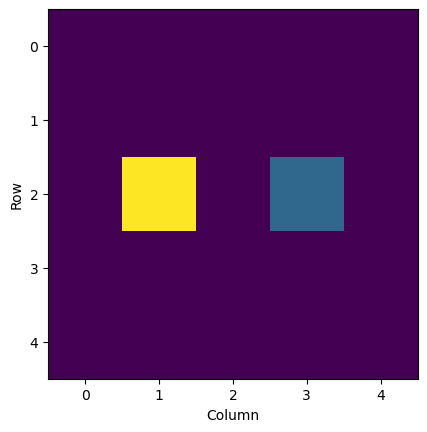

In [13]:
# collapse the maze into a 2D grid
Maze_2D = l_maze.inner_collapse(axis_=2)
# show the collapsed maze
plt.imshow(Maze_2D)
# title the axes
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

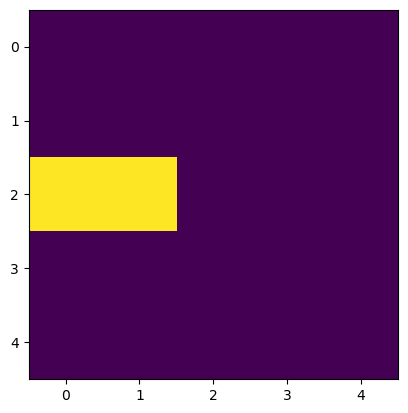

In [17]:
l_maze.show_layer(1)

In [21]:
M = l_maze.get_maze()

np.where(M==1)

source_pt = (2, 1, 0)
# go through each layer and at each layer
# start dfs searches at each point that is accessible from the lower layer
# and end the dfs search at each point that is accessible from the upper layer
# if the dfs search finds a path between the two points, then connect them
# if the dfs search does not find a path between the two points, then do not connect them

def layer_dfs(source_pt_, layer_grid_):
    '''
    return all the visited pts within this grid
    '''
    def get_neighbors(cur_pt_, layer_grid_):
        '''
        return the neighbors of the current point
        '''
        # initialize the neighbors
        neighbors = []
        # get the coordinates of the current point
        x, y, z = cur_pt_
        # get the shape of the layer grid
        num_row, num_column = layer_grid_.shape
        # get the neighbors of the current point
        if x + 1 < num_row and layer_grid_[x + 1, y] == 1:
            neighbors.append((x + 1, y, z))
        if x - 1 >= 0 and layer_grid_[x - 1, y] == 1:
            neighbors.append((x - 1, y, z))
        if y + 1 < num_column and layer_grid_[x, y + 1] == 1:
            neighbors.append((x, y + 1, z))
        if y - 1 >= 0 and layer_grid_[x, y - 1] == 1:
            neighbors.append((x, y - 1, z))

        # return the neighbors
        return neighbors
    
    def dfs_search(source_pt_, layer_grid_):
        '''
        return all the visited pts within this grid
        '''
        # initialize the visited points
        visited_pts = []
        # initialize the stack
        stack = [source_pt_]
        # while the stack is not empty
        while len(stack) > 0:
            # pop the top point from the stack
            cur_pt = stack.pop()
            # if the current point is not in the visited points
            if cur_pt not in visited_pts:
                # add the current point to the visited points
                visited_pts.append(cur_pt)
                # get the neighbors of the current point
                neighbors = get_neighbors(cur_pt, layer_grid_)
                # add the neighbors to the stack
                stack.extend(neighbors)
        # return the visited points
        return visited_pts
    
    # get the points in the layer
    layer_points = np.where(layer_grid_ == 1)
    
    # from the source point, do a dfs search
    visited_pts = dfs_search(source_pt_, layer_grid_)
    
    # return the visited points
    return visited_pts

for l in range(1, M.shape[2]):
    if l == 1:
        # upper layer should be accessible from source point 
        if M[source_pt[0], source_pt[1], l] == 0:
            assert False
        print(layer_dfs(source_pt, M[:, :, l]))

    else:
        accessible_pts = np.where(np.logical_and(M[:, :, l - 1], M[:, :, l]))
        for i in range(len(accessible_pts[0])):
            # get the source point
            source_pt = (accessible_pts[0][i], accessible_pts[1][i], l - 1)
            # get the layer grid
            layer_grid = M[:, :, l]
            # get the visited points
            visited_pts = layer_dfs(source_pt, layer_grid)
            # if the visited points is empty
            if len(visited_pts) == 0:
                pass
                # assert that the source point is not accessible from the lower layer
                # assert False
            # else, the visited points is not empty
            else:
                # assert that the source point is accessible from the lower layer
                print(visited_pts)
    

[(2, 1, 0), (2, 0, 0)]
[(2, 1, 1), (1, 1, 1)]
[(2, 1, 2), (2, 2, 2), (2, 3, 2)]
[(2, 3, 3), (3, 3, 3)]
